### Question 1: Fit a Linear Regression (20)

Complete each sub-questions with either codes or written answers. Make sure to print your result if necessary. We are going to use the data from Homework 1, the diabetes data. 

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(data.DESCR)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

##### 1a. Plot a scatter plot between the target value and BMI. Show the estimated linear regression line and describe what you have seen.  

In [2]:
import pandas as pd
df1 = pd.DataFrame(data=data.data, 
                  columns=data.feature_names)
df2 = pd.DataFrame(y, columns=['Disease Progression'])
df = pd.concat([df1, df2], axis=1)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


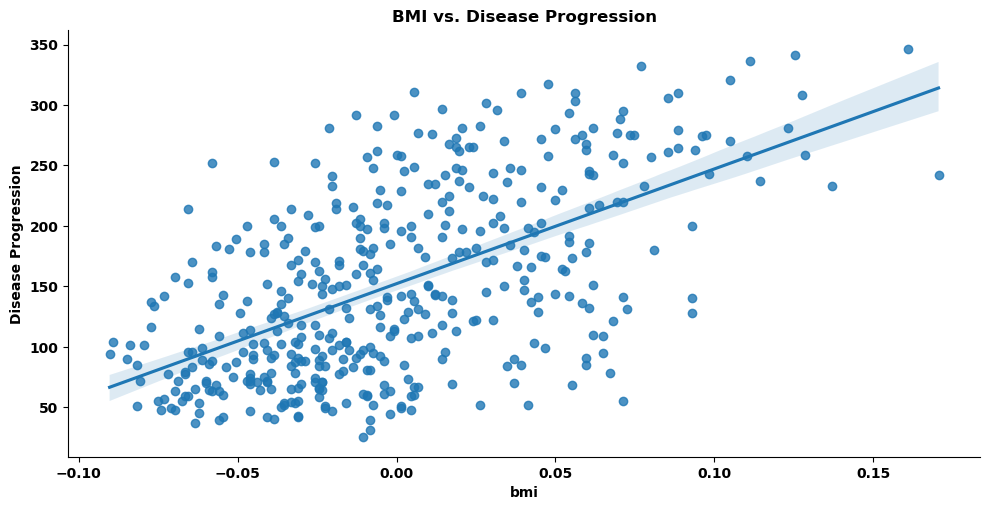

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'bmi' , y = 'Disease Progression', data = df, aspect = 2)
plt.title('BMI vs. Disease Progression')
plt.show()

I see that there seems to a positive correlation between bmi and disease progression, i.e., higher bmi likely means disease is more advanced.

##### 1b. Plot a scatter plot between the target value and one other feature in the data. Show the estimated linear regression line and describe what you have seen. 

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


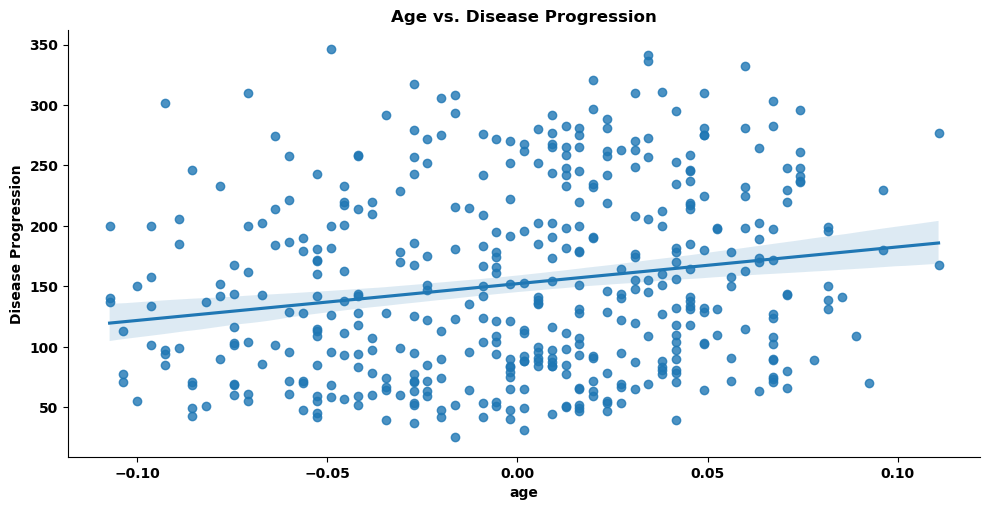

In [4]:
sns.lmplot(x = 'age' , y = 'Disease Progression', data = df, aspect = 2)
plt.title('Age vs. Disease Progression')
plt.show()

Seems there's no correlation between age and how progressed diabetes is. Since data points are evenly spaced on space, the residuals or errors are fairly large for a lot of points. I think a linear model doesn't do a good job at capturing the relationship between age and disease progression (if any).

##### 1c. Fit a linear model between the target value and BMI. Print the intercept and slope. Describe how BMI affects the target value. 

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = df.drop('Disease Progression', axis=1)
y = df['Disease Progression']

lm.fit(X[['bmi']], y)

print("The estimated intercept coefficient is %.3f" %lm.intercept_)
print("the estimated coefficient for weight is %.3f" %lm.coef_)

The estimated intercept coefficient is 152.133
the estimated coefficient for weight is 949.435


C:\Users\hafid\AppData\Local\Temp\ipykernel_13488\2967870114.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("the estimated coefficient for weight is %.3f" %lm.coef_)


Theoretically, our model predicts the target value will be of about 152 when the bmi is 0 but of course this is not possible.
We also estimate the slope to be of about 949, which implies the target value goes up by 949 per unit increment of bmi.

##### 1d. Fir a linear model between the target value and all features. Print the coefficients for all features. 

In [6]:
lm.fit(X, y)
print("The estimated intercept coefficient is %.3f" %lm.intercept_)
print("The estimated coefficients for weight are:\n", lm.coef_)

The estimated intercept coefficient is 152.133
The estimated coefficients for weight are:
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


##### 1e. Do you think linear model is a good model to use in this case? (Think about whether linear regression assumptions are satisfied. )

- L: X and Y must have a linear relationship
- I: The individual observations, and therefore residuals, must be independent
- N: The residuals must be normally distributed with mean 0
- E: The errors must have constant variance
- D: The explanatory variables are (almost) independent with each other

I don't think a linear model is the best model for this case because it's likely some of the numerical values are not independent of each other. For instance, I would claim bmi and age are dependent as we tend to gain weight as we get older.
Another reason is that the errors don't have constant variance since they're smaller on the endpoints of the line, and bigger
around the middle part of the line.

### Question 2: Gradient Descent in Linear Regression (30)

Write Python code to implement the gradient descent method in linear regression. You can use the functions as a start (or you can start from scratch). Verify your code with sample data and LinearRegression in sklearn. 

In [7]:
import numpy as np

# Generate a sample data with target y and feature X, feel free to change
x = np.random.normal(loc=5, scale=3, size=100)
y = 2 * x + np.random.normal(loc=0, scale=1, size=100)
X = np.column_stack((np.ones(100), x))

In [15]:
print(type(X))
print(y.shape)

<class 'numpy.ndarray'>
(100,)


In [8]:
# Implement the gradient descent functions. Import any module if you need. 
def compute_cost(predictions, y):
    """MSE calculation for given predictions and true values
    """
    n = len(y)
    cost = 1 / n * sum((y - predictions) ** 2)
    return cost

def gradient_descent(X_b, y, theta, learning_rate, num_iterations):
    n = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        # X_b * theta
        predictions = np.dot(X_b, theta)
        
        # Current error
        error = y - predictions
        
        # Optimal solutions for each coefficient
        gradient0 = (-2 / n) * np.sum(error)
        gradient1 = (-2 / n) * np.sum(np.dot(X_b.T, (y - predictions)))
        
        # Update coefficients
        theta[0] = theta[0] - learning_rate * gradient0
        theta[1] = theta[1] - learning_rate * gradient1
        
        # Conpute and keep track of MSE's
        cost = compute_cost(predictions, y)
        cost_history.append(cost)
  
    return theta, cost_history

In [9]:
# Run your code with the sample X and y. Then compare with the result with LinearRegression in sklearn. 
theta, cost_history = gradient_descent(X, y, [0, 0], 0.01, 1000)
theta = [round(i, 3) for i in theta]
print(theta)
print(cost_history)

[0.104, 1.987]
[128.21719456357286, 9.025730860736378, 1.3506362992323577, 0.8524471356726301, 0.819071505312499, 0.8165365036464348, 0.8162324614939211, 0.8161352515596904, 0.8160677497294373, 0.8160066881222696, 0.8159475690806687, 0.8158893426245197, 0.8158317457728916, 0.815774708775367, 0.8157182103137419, 0.8156622412987902, 0.8156067957590476, 0.8155518685437249, 0.8154974547430893, 0.8154435495419516, 0.8153901481824042, 0.815337245954105, 0.8152848381915196, 0.8152329202729185, 0.8151814876198188, 0.8151305356965456, 0.8150800600098207, 0.8150300561083649, 0.8149805195825026, 0.8149314460637767, 0.81488283122456, 0.8148346707776744, 0.8147869604760142, 0.8147396961121691, 0.8146928735180566, 0.8146464885645495, 0.8146005371611168, 0.8145550152554616, 0.8145099188331588, 0.8144652439173105, 0.8144209865681868, 0.8143771428828818, 0.8143337089949698, 0.8142906810741639, 0.8142480553259779, 0.8142058279913919, 0.8141639953465202, 0.8141225537022848, 0.8140814994040863, 0.81404082

In [10]:
lm = LinearRegression()

# Make x into column vector (take transpose)
lm.fit(x.reshape(-1, 1), y)

print("The estimated intercept coefficient is %.3f" %lm.intercept_)
print("the estimated coefficient for weight is %.3f" %lm.coef_)
print(f"Our Gradient Descent algorithm's intercept coef. is {round(lm.intercept_ - theta[0], 3)} off the one from sklearn")
print(f"Our Gradient Descent algorithm's weight coef. if {round(float(lm.coef_ - theta[1]), 3)} off the one from sklearn")

The estimated intercept coefficient is 0.102
the estimated coefficient for weight is 1.987
Our Gradient Descent algorithm's intercept coef. is -0.002 off the one from sklearn
Our Gradient Descent algorithm's weight coef. if 0.0 off the one from sklearn


C:\Users\hafid\AppData\Local\Temp\ipykernel_13488\511375324.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("the estimated coefficient for weight is %.3f" %lm.coef_)
C:\Users\hafid\AppData\Local\Temp\ipykernel_13488\511375324.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Our Gradient Descent algorithm's weight coef. if {round(float(lm.coef_ - theta[1]), 3)} off the one from sklearn")


### Question 3 MLE for Poisson Regression (30)

In the lecture we have showed you how to achieve the MLE for the linear regression. Now let's try to replicate it with another regression: Poisson regression. We will discuss it more later so don't worry if you have never heard about it. 

Poisson regression only has one parameter $\lambda$, which is also the mean of the distribution (like the $\mu$ in the linear regression). The pdf is 
$$f(X_i|\lambda) = \frac{\lambda^{X_i} e^{-\lambda}}{X_i!}$$
while $X_i!$ is the factorial of $X_i$. 

Now try to esimate the MLE for the $\lambda$ in Poisson regression. Latex is preferred but written and submitted by picture is also accpetable. (Hint: review the lecture note and follow the steps: write the likelihood, calculate the log-likelihood, take the derivative and solve the equation when the derivative is equal to 0. The answer is a simple one and there is no factorial included.)

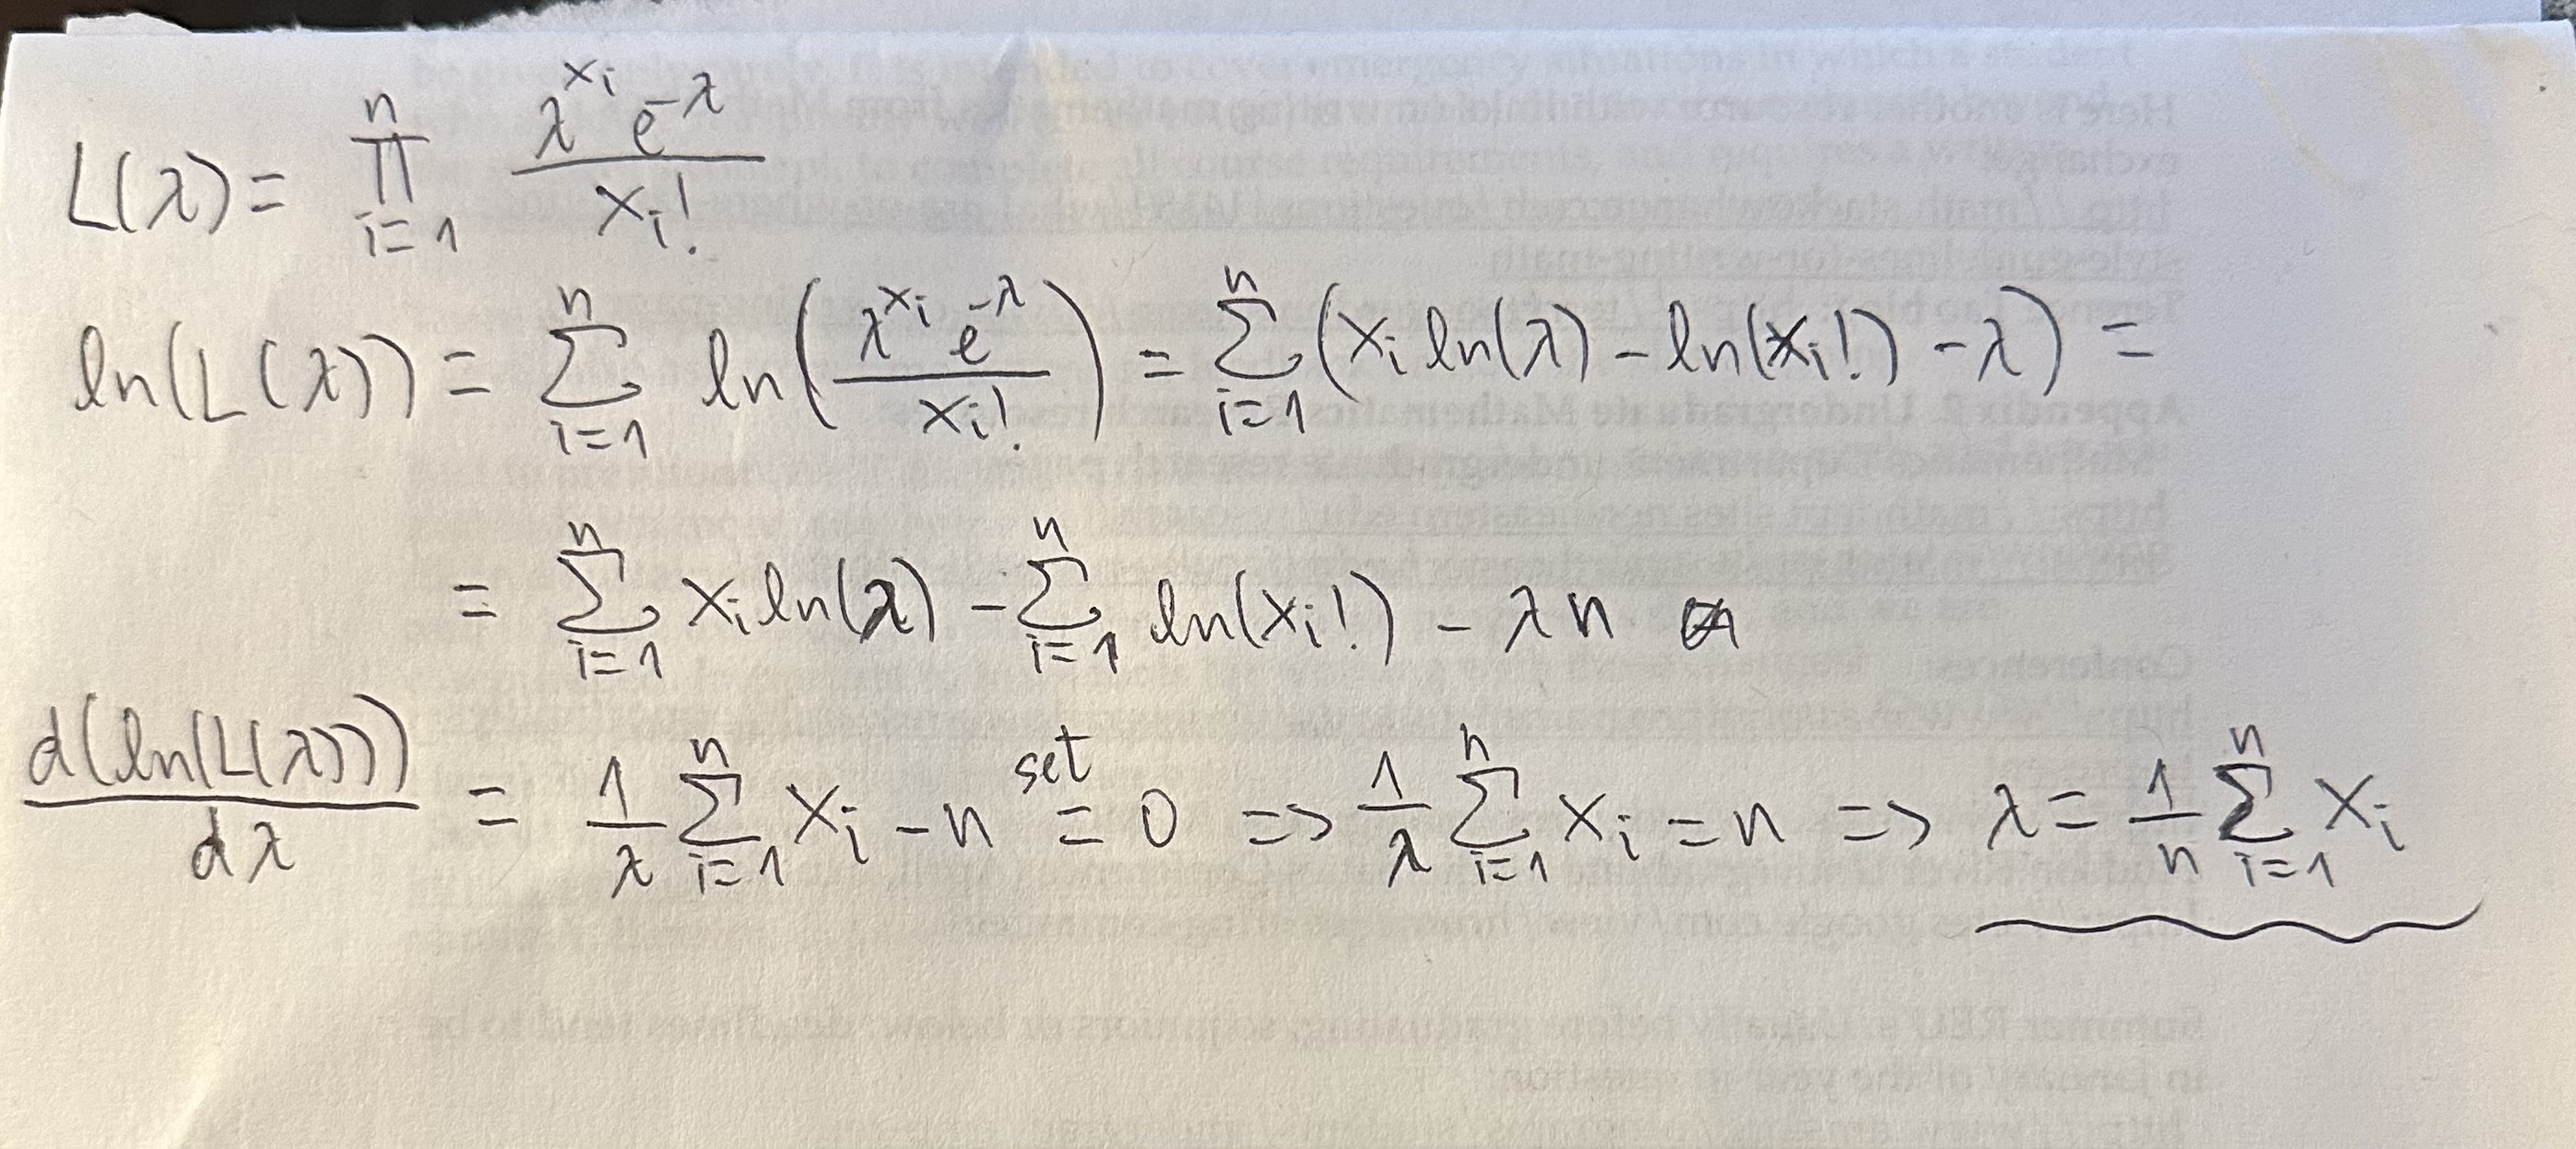

### Question 4 Another MLE practice (20)

Let's make a random pdf, when $0 \leq X_i \leq \theta$, we have:

$$f(X_i|\theta ) = 2 * \frac{(\theta - X_i)}{\theta^2} $$

For all the other value, let $f(X_i|\theta) = 0$. 

1. First, prove it is a valid pdf. Hint: a valid pdf means all the values are positive and the interval of pdf should be equal to 1. 
2. Calculate the MLE estimator. Stop after taking the deriative since the equation doesn't have a simple closed-form solution

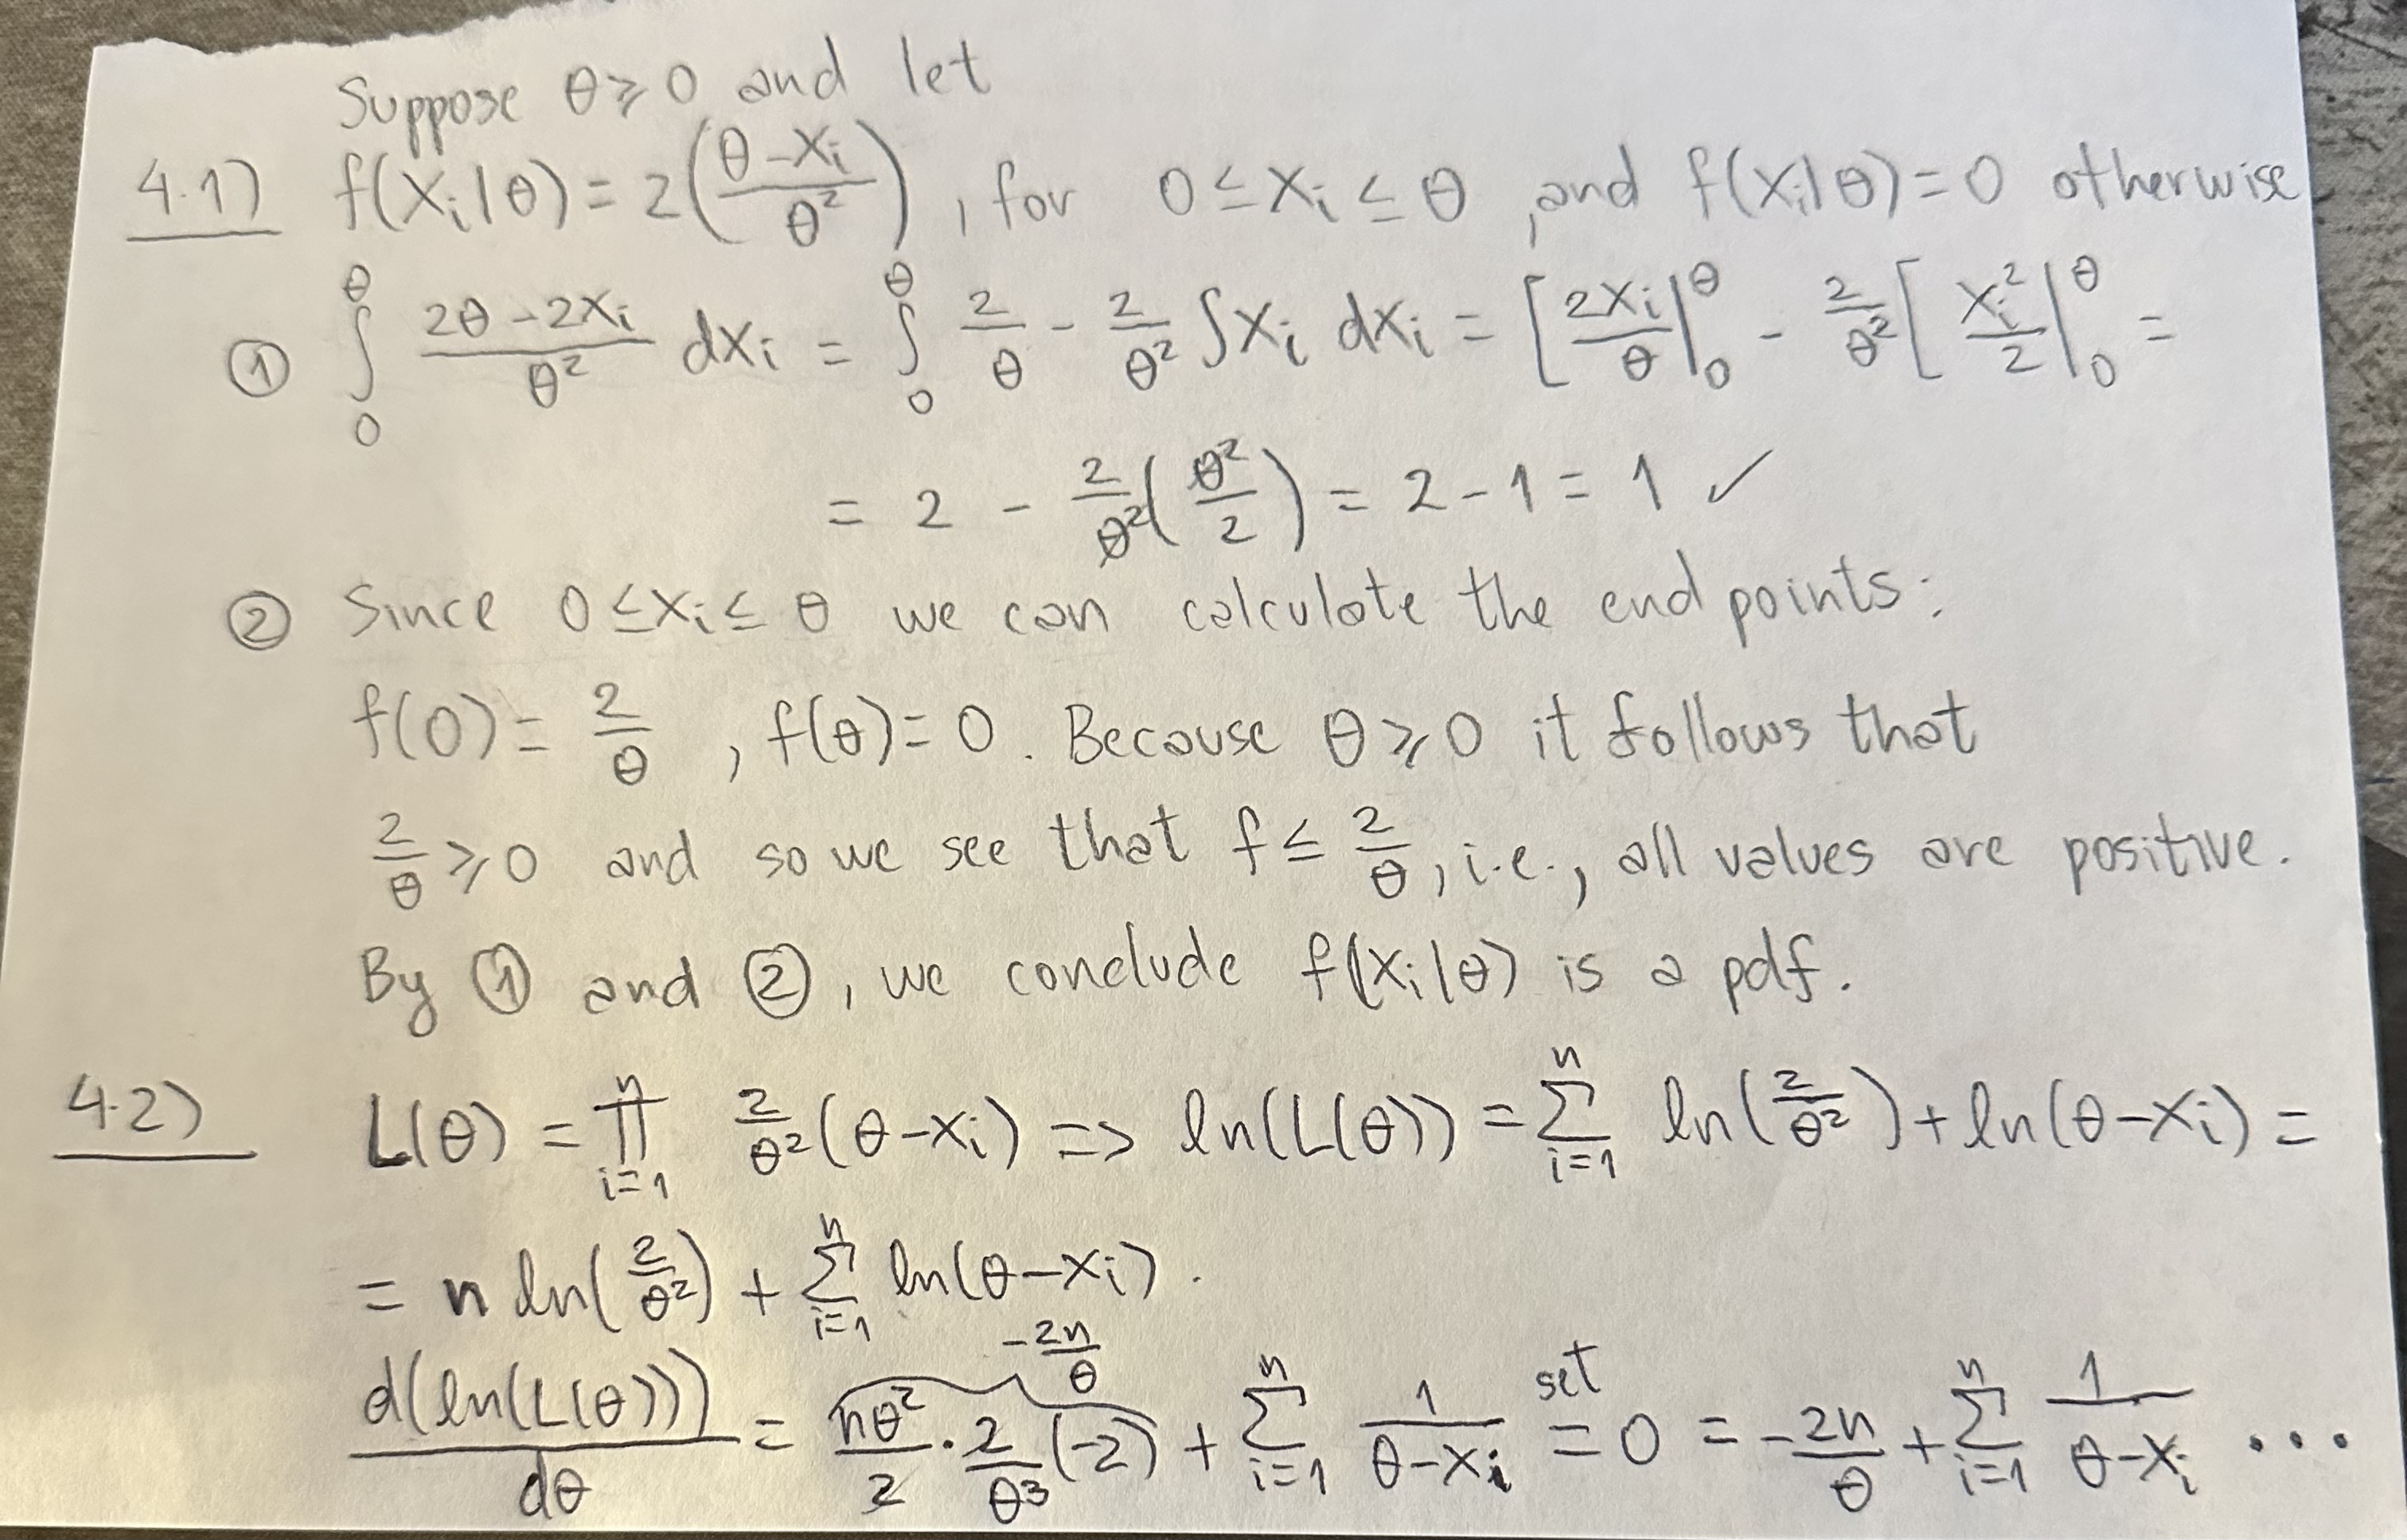